In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import gc
from scipy.interpolate import griddata
import scipy.io as sio
import scipy.interpolate as si

sns.set(style='ticks', palette="Set2")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [2]:
def Rayleigh_velocities(f, vc0, f0, xi):
    '''
    calculates the Rayleigh phase and group velocities following
    equations 30 & 31 in Gestrich et al (2020)
    
    ---INPUTS---
    f   : frequency (Hz)
    vc0 : Rayleigh reference velocity (m/s)
    f0  : reference frequency (Hz)
    xi  : exponent defining power-law relation
    
    ---RETURNS---
    vc : Rayleigh-wave phase velocity (m/s)
    vu : Rayleigh-wave group velocity (m/s)
    '''
    vc = vc0 * (f / f0) ** (-xi)
    vu = vc / (1 + xi)
    return vc, vu

In [3]:
def impact_full_expression(f, u_mean=120, eb=0.8, phi_p=0.1, Dr=1.4e-3, R=9,
                          df=300, rx=9.5e3, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    equation for impact PSD given in equation 28 from Gestrich et al (2020)
    
    ---INPUTS---
    f : frequencies to evaluate PSD
    
    optional
        u_mean : mean vertical velocity (m/s)
        eb     : coefficient of restitution
        phi_p  : particle volume fraction
        Dr     : representative grain size (m)
        R      : conduit radius (m)
        df     : fragmentation depth (m)
        rx     : horizontal source reciever distance (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    vc, vu = Rayleigh_velocities(f, vc0, f0, xi)
    
    fac1 = 0.088
    fac2 = (u_mean * f)**3
    fac3 = (1 + eb)**2 * phi_p * Dr**3
    fac4 = np.exp(-2 * np.pi * f * rx / (vu * Q)) * R * df / (rx * vc**3 * vu**2)
    
    PSD = fac1 * fac2 * fac3 * fac4
    
    return PSD

In [4]:
def turbulence_full_expression(f, u_mean=120, Db=0.5, rho_g=0.5, rho_s=2400, R=9,
                              df=300, rx=9.5e3, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    equation for turbulence PSD given in equation 29 from Gestrich et al (2020)
    
    ---INPUTS---
    f : frequencies to evaluate PSD
    
    optional
        u_mean : mean vertical velocity (m/s)
        Db     : roughness size (m)
        rho_g  : gas density (kg / m^3)
        rho_s  : solid density (kg / m^3)
        R      : conduit radius (m)
        df     : fragmentation depth (m)
        rx     : horizontal source reciever distance (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    vc, vu = Rayleigh_velocities(f, vc0, f0, xi)
    
    fac1 = 5.8e-4
    fac2 = u_mean**(14/3) * f**(4/3)
    fac3 = Db**(4/3) * (rho_g / rho_s)**2
    fac4 = np.exp(-2 * np.pi * f * rx / (vu * Q)) * R * df / (rx * vc**3 * vu**2)
    
    PSD = fac1 * fac2 * fac3 * fac4
    
    return PSD

In [5]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_default = impact_full_expression(freq)
impactsPSD_default_dB = 10 * np.log10(impactsPSD_default)

# impactsPSD_min = impact_full_expression(freq, Q=30)
# impactsPSD_min_dB = 10 * np.log10(impactsPSD_min)

# impactsPSD_max = impact_full_expression(freq, Q=150)
# impactsPSD_max_dB = 10 * np.log10(impactsPSD_max)

impactsPSD_min = impact_full_expression(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD_min_dB = 10 * np.log10(impactsPSD_min)

impactsPSD_max = impact_full_expression(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD_max_dB = 10 * np.log10(impactsPSD_max)



impactsPSD10_min = impact_full_expression(freq, u_mean=60, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD10_min_dB = 10 * np.log10(impactsPSD10_min)

impactsPSD10_max = impact_full_expression(freq, u_mean=160, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD10_max_dB = 10 * np.log10(impactsPSD10_max)



turbulencePSD_default = turbulence_full_expression(freq)
turbulencePSD_default_dB = 10 * np.log10(turbulencePSD_default)

# turbulencePSD_min = turbulence_full_expression(freq, Q=30)
# turbulencePSD_min_dB = 10 * np.log10(turbulencePSD_min)

# turbulencePSD_max = turbulence_full_expression(freq, Q=150)
# turbulencePSD_max_dB = 10 * np.log10(turbulencePSD_max)

turbulencePSD_min = turbulence_full_expression(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD_min_dB = 10 * np.log10(turbulencePSD_min)

turbulencePSD_max = turbulence_full_expression(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_max_dB = 10 * np.log10(turbulencePSD_max)


turbulencePSD10_min = turbulence_full_expression(freq, u_mean=170, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD10_min_dB = 10 * np.log10(turbulencePSD10_min)

turbulencePSD10_max = turbulence_full_expression(freq, u_mean=170, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD10_max_dB = 10 * np.log10(turbulencePSD10_max)

<IPython.core.display.Javascript object>


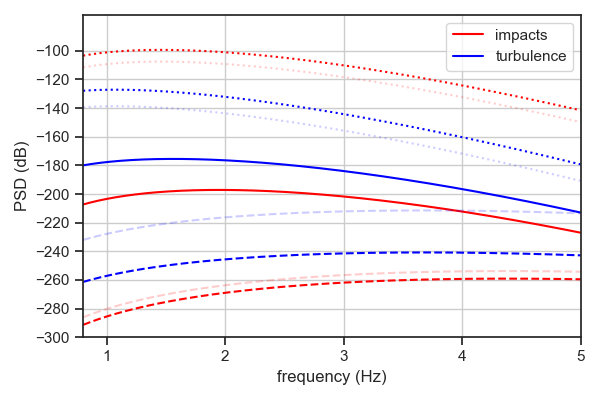

In [6]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, impactsPSD_default_dB, color='r', label='impacts')
plt.plot(freq, impactsPSD_min_dB, color='r', linestyle='--')
plt.plot(freq, impactsPSD_max_dB, color='r', linestyle=':')
plt.plot(freq, impactsPSD10_min_dB, alpha=0.2, color='r', linestyle='--')
plt.plot(freq, impactsPSD10_max_dB, alpha=0.2, color='r', linestyle=':')
plt.plot(freq, turbulencePSD_default_dB, color='b', label='turbulence')
plt.plot(freq, turbulencePSD_min_dB, color='b', linestyle='--')
plt.plot(freq, turbulencePSD_max_dB, color='b', linestyle=':')
plt.plot(freq, turbulencePSD10_min_dB, alpha=0.2, color='b', linestyle='--')
plt.plot(freq, turbulencePSD10_max_dB, alpha=0.2, color='b', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/min-max-PSD-statedValues.png', dpi=300)
plt.show()

Below is the implementation of the modular setup: each expression used to build up the full expression (see above) in Gestrich et al (2020). Note that the two version are inconsistent due to a suspected algebra error on the author's part in arriving at the full expression.

In [7]:
def Rayleigh_greens_function_vertical(f, rho_s=2400, rx=9.5e3, vc0=1400, f0=1.0, 
                                      xi=0.55, Q=50):
    '''
    vertical component of Rayleigh-waves Green's functions in frequency-space
    from equation 4 in Gestrich et al (2020)
    assumes source-receiver azimuthal angle is 0
    
    ---INPUTS---
    f : frequencies to evaluate Green's functions at
    
    optional
        rho_s  : solid density (kg / m^3)
        rx     : horizontal source reciever distance (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    GF : vertical components of Green's functions to convolve w/ arbitrary force
         (3, #frequencies)
    '''
    vc, vu = Rayleigh_velocities(f, vc0, f0, xi)
    k = 2 * np.pi * f / vc
    
    gf_fac = k / (8 * rho_s * vc * vu)
    gf_fac *= np.sqrt(2 / (np.pi * k * rx))
    gf_fac *= np.exp(-np.pi * f * rx / (vu * Q))
    
    GF = np.zeros((3,) + f.shape)
    GF[0] = 0.8 * gf_fac # x-component of force
    GF[1] = 0 * gf_fac # y-component of force
    GF[2] = 0.6 * gf_fac # z-component
    
    return GF

In [8]:
def particle_impact_rate(u_mean, phi_p, D, D_dist):
    '''
    returns particle impact rate calculated by eq 7 in Gestrich et al (2020)
    
    ---INPUTS---
    u_mean : mean vertical velocity (m/s)
    phi_p  : particle volume fraction
    D      : grain size (m)
    D_dist : grain size distribution (1/m)
    ---RETURNS---
    rate : impact rate 
    '''
    rate = 0.1 * u_mean * phi_p * D_dist / D**3
    return rate

In [9]:
def particle_impact_force(eb, m, u_mean):
    '''
    calculates Fourier transform of impact force after integrating over
    impact angles, following eq 15 and 16
    
    ---INPUTS---
    eb     : coefficient of restitution
    m      : mass of particle
    u_mean : mean vertical velocity (m/s)
    ---RETURNS---
    force : x,y,z components of impact force from particle
    '''
    impact = (1 + eb) * m * u_mean
    
    if isinstance(u_mean, np.ndarray):
        force = np.zeros((3,)+u_mean.shape)
    else:
        force = np.zeros(3)
    force[0] = 0.36 * impact
    force[1] = 0.36 * impact
    force[2] = 0.29 * impact
    
    return force

In [10]:
def impact_PSD(f, u_mean=120, eb=0.8, phi_p=0.1, Dr=1.4e-3, R=9, rho_s=2400, df=300, 
               rx=9.5e3, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    calculates seismic PSD from particle impacts following eq 3 in Gestrich et al (2020)
    
    ---INPUTS---
    f : frequencies to evaluate PSD
    
    optional
        u_mean : mean vertical velocity (m/s)
        eb     : coefficient of restitution
        phi_p  : particle volume fraction
        Dr     : representative grain size (m)
        R      : conduit radius (m)
        rho_s  : solid density (kg / m^3)
        df     : fragmentation depth (m)
        rx     : horizontal source reciever distance (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    Dr_dist = 1 # for representative grain size
    m = rho_s * (4/3) * np.pi * Dr**3 # mass of representative grain size
    
    impact_force = particle_impact_force(eb, m, u_mean)
    impact_rate = particle_impact_rate(u_mean, phi_p, Dr, Dr_dist)
    RW_GF = Rayleigh_greens_function_vertical(f, rho_s, rx, vc0, f0, xi, Q)
    
    FjGjz = impact_force[0] * RW_GF[0] + impact_force[1] * RW_GF[1] + impact_force[2] * RW_GF[2]
    
    PSD = 2 * np.pi * R * df * impact_rate * (2 * np.pi * f * FjGjz)**2
    
    return PSD

In [11]:
def dissipation_rate(u_star, Db, kappa=0.4):
    '''
    eq 23 in Gestrich et al (2020)
    
    ---INPUTS---
    u_star : shear velocity in turbulent layer (m/s)
    Db     : roughness size (m)
    
    optional
        kappa : Von Karman constant
    ---RETURNS---
    epsilon : dissipation rate
    '''
    epsilon = u_star**3 / (kappa * Db / 4)
    return epsilon

In [12]:
def Kolmogorov_velocity_spectrum(f, u_mean, Db, K=0.5, kappa=0.4):
    '''
    eq 24 in Gestrich et al (2020)
    
    ---INPUTS---
    f      : frequency (Hz)
    u_mean : mean vertical velocity (m/s)
    Db     : roughness size (m)
    
    optional
        K     : Kolmogorov universal constant
        kappa : Von Karman constant
    ---RETURNS---
    Ek_tilda : velocity spectrum for given frequencies
    '''
    kt = 15 * f / u_mean
    epsilon = dissipation_rate(0.06 * u_mean, Db, kappa)
    
    Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
    Ek_tilda = 2 * np.pi * Ek / (0.42 * u_mean)
    
    return Ek_tilda

In [13]:
def force_spectrum(f, u_mean, rho_g, Db, C=0.5, K=0.5, kappa=0.4, chi_fl=1.0):
    '''
    eq 25 and 26 in Gestrich et al (2020)
    
    ---INPUTS---
    f      : frequency (Hz)
    u_mean : mean vertical velocity (m/s)
    rho_g  : gas density (kg / m^3)
    Db     : roughness size (m)
    
    optional
        C      : drag coefficient:
        K      : Kolmogorov universal constant
        kappa  : Von Karman constant
        chi_fl : fluid-dynamic admittance
    ---RETURNS---
    F_tilda : force spectrum for given frequencies
    '''
    A = np.pi * Db**2 / 4
    Ek_tilda = Kolmogorov_velocity_spectrum(f, u_mean, Db, K, kappa)
    Fp = (C * rho_g * 0.42 * u_mean * A)**2 * Ek_tilda * chi_fl**2
    
    F_tilda = Fp * Db**(-2)
    return F_tilda

In [14]:
def turbulence_PSD(f, u_mean=120, Db=0.5, rho_g=0.5, rho_s=2400, R=9, df=300, 
                   rx=9.5e3, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    calculates turbulence PSD according to equation 17 from Gestrich et al (2020)
    
    ---INPUTS---
    f : frequencies to evaluate PSD
    
    optional
        u_mean : mean vertical velocity (m/s)
        Db     : roughness size (m)
        rho_g  : gas density (kg / m^3)
        rho_s  : solid density (kg / m^3)
        R      : conduit radius (m)
        df     : fragmentation depth (m)
        rx     : horizontal source reciever distance (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    F_tilda = force_spectrum(f, u_mean, rho_g, Db)
    RW_GF = Rayleigh_greens_function_vertical(f, rho_s, rx, vc0, f0, xi, Q)
    
    FGjz2 = F_tilda * (RW_GF[0] + RW_GF[1] + RW_GF[2])**2
    
    PSD = 8 * np.pi**3 * R * df * f**2 * FGjz2
    
    return PSD

In [15]:
freq = np.linspace(0.8, 5, 1000)

impactsPSD_mod = impact_PSD(freq) #/ 5.805 * 0.088
impactsPSD_mod_dB = 10 * np.log10(impactsPSD_mod)

impactsPSD_mod_min = impact_PSD(freq, u_mean=40, eb=0.5, phi_p=0.01, Dr=6.25e-5, R=2,
                          df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
impactsPSD_mod_min_dB = 10 * np.log10(impactsPSD_mod_min)

impactsPSD_mod_max = impact_PSD(freq, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
impactsPSD_mod_max_dB = 10 * np.log10(impactsPSD_mod_max)

impactsPSD_mod_D = impact_PSD(freq, Dr=6.25e-5) #/ 5.805 * 0.088
impactsPSD_mod_D = 10 * np.log10(impactsPSD_mod_D)



turbulencePSD_mod = turbulence_PSD(freq) #/ 0.00113243 * 5.8e-4
turbulencePSD_mod_dB = 10 * np.log10(turbulencePSD_mod)

turbulencePSD_mod_min = turbulence_PSD(freq, u_mean=40, Db=0.01, rho_g=0.05, rho_s=2100, R=2,
                              df=100, rx=9.5e3, vc0=2175, f0=1.0, xi=0.7, Q=150)
turbulencePSD_mod_min_dB = 10 * np.log10(turbulencePSD_mod_min)

turbulencePSD_mod_max = turbulence_PSD(freq, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_mod_max_dB = 10 * np.log10(turbulencePSD_mod_max)

<IPython.core.display.Javascript object>


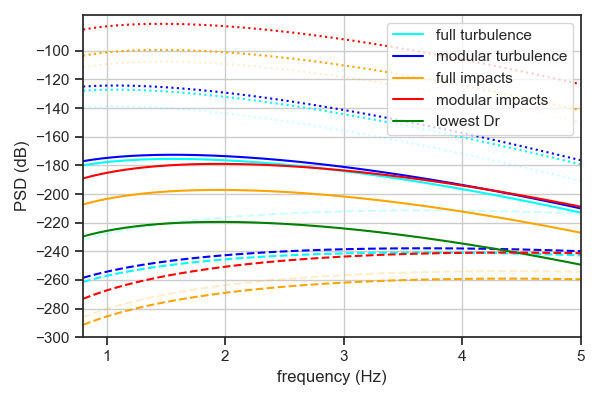

In [16]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_default_dB, color='cyan', label='full turbulence')
plt.plot(freq, turbulencePSD_min_dB, color='cyan', linestyle='--')
plt.plot(freq, turbulencePSD_max_dB, color='cyan', linestyle=':')
plt.plot(freq, turbulencePSD10_min_dB, alpha=0.2, color='cyan', linestyle='--')
plt.plot(freq, turbulencePSD10_max_dB, alpha=0.2, color='cyan', linestyle=':')

plt.plot(freq, turbulencePSD_mod_dB, color='b', label='modular turbulence')
plt.plot(freq, turbulencePSD_mod_min_dB, color='b', linestyle='--')
plt.plot(freq, turbulencePSD_mod_max_dB, color='b', linestyle=':')

plt.plot(freq, impactsPSD_default_dB, color='orange', label='full impacts')
plt.plot(freq, impactsPSD_min_dB, color='orange', linestyle='--')
plt.plot(freq, impactsPSD_max_dB, color='orange', linestyle=':')
plt.plot(freq, impactsPSD10_min_dB, alpha=0.2, color='orange', linestyle='--')
plt.plot(freq, impactsPSD10_max_dB, alpha=0.2, color='orange', linestyle=':')

plt.plot(freq, impactsPSD_mod_dB, color='r', label='modular impacts')
plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Beginning implementation of extended source version of the modular version (only significant change is in output structure). Checked against the output for the point source version for consistency.

In [17]:
def turbulence_PSD_extended(f, u_mean, rx, Db=0.5, rho_g=0.5, rho_s=2400, R=9, 
                            dz=2, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    calculates turbulence PSD according to equation 17 from Gestrich et al (2020) for
    extended source (rather than point source)
    
    ---INPUTS---
    f      : frequencies to evaluate PSD
    u_mean : mean vertical velocity (m/s)
    rx     : horizontal source reciever distance for each source segment (m)
    
    optional
        Db     : roughness size (m)
        rho_g  : gas density (kg / m^3)
        rho_s  : solid density (kg / m^3)
        R      : conduit radius (m)
        dz     : segment vertical width (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies for each source segment
    '''
    ff = len(f)
    ll = len(u_mean)
    
    f_matrix = np.tile(freq, (ll, 1))
    u_matrix = np.tile(u_mean, (ff, 1)).transpose()
    F_tilda = force_spectrum(f_matrix, u_matrix, rho_g, Db)
    gc.collect()
    
    rx_matrix = np.tile(rx, (ff, 1)).transpose()
    RW_GF = Rayleigh_greens_function_vertical(f_matrix, rho_s, rx_matrix, vc0, f0, xi, Q)
    gc.collect()
    
    FGjz2 = F_tilda * (RW_GF[0] + RW_GF[1] + RW_GF[2])**2
    
    PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2
    
    return PSD

In [18]:
def impact_PSD_extended(f, u_mean, Dr, rx, eb=0.8, phi_p=0.1, R=9, rho_s=2400, 
                        dz=2, vc0=1400, f0=1.0, xi=0.55, Q=50):
    '''
    calculates seismic PSD from particle impacts following eq 3 in Gestrich et al (2020) for
    extended source (rather than point source)
    
    ---INPUTS---
    f      : frequencies to evaluate PSD
    u_mean : mean vertical velocity (m/s)
    Dr     : representative grain size (m)
    rx     : horizontal source reciever distance for each source segment (m)
    
    optional
        eb     : coefficient of restitution
        phi_p  : particle volume fraction
        R      : conduit radius (m)
        rho_s  : solid density (kg / m^3)
        dz     : segment vertical width (m)
        vc0    : Rayleigh-wave reference velocity (m/s)
        f0     : Rayleigh-wave reference frequency (Hz)
        xi     : Rayleigh-wave velocity exponent
        Q      : Rayleigh-wave quality factor
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    ff = len(f)
    ll = len(u_mean)
    
    f_matrix = np.tile(freq, (ll, 1))
    u_matrix = np.tile(u_mean, (ff, 1)).transpose()
    Dr_matrix = np.tile(Dr, (ff, 1)).transpose()
    rx_matrix = np.tile(rx, (ff, 1)).transpose()
    
    Dr_dist = 1 # for representative grain size
    m = rho_s * (4/3) * np.pi * Dr_matrix**3 # mass of representative grain size
    
    impact_force = particle_impact_force(eb, m, u_matrix)
    impact_rate = particle_impact_rate(u_matrix, phi_p, Dr_matrix, Dr_dist)
    RW_GF = Rayleigh_greens_function_vertical(f_matrix, rho_s, rx_matrix, vc0, f0, xi, Q)
    
    FjGjz = impact_force[0] * RW_GF[0] + impact_force[1] * RW_GF[1] + impact_force[2] * RW_GF[2]
    
    PSD = 2 * np.pi * R * dz * impact_rate * (2 * np.pi * f_matrix * FjGjz)**2
    
    return PSD

In [19]:
ll = int(300 / 2)
# rho_g = 0.5
# Db = 0.5
# vc0=1400
# f0=1.0
# xi=0.55
# Q=50
# rho_s=2400

Dr = 1.4e-3 * np.ones(ll)

ff = 1000
freq = np.linspace(0.8, 5, ff)
rx = 9.5e3 * np.ones(ll)
u_mean = 120 * np.ones(ll)


# f_matrix = np.tile(freq, (ll, 1))
# u_matrix = np.tile(u_mean, (ff, 1)).transpose()
# rx_matrix = np.tile(rx, (ff, 1)).transpose()

test = turbulence_PSD_extended(freq, u_mean, rx)
test_imp = impact_PSD_extended(freq, u_mean, Dr, rx)

test_integrated = np.sum(test, axis=0)
test_dB = 10 * np.log10(test_integrated)
test_imp_integrated = np.sum(test_imp, axis=0)
test_imp_dB = 10 * np.log10(test_imp_integrated)
print(test_integrated.shape)

(1000,)


<IPython.core.display.Javascript object>


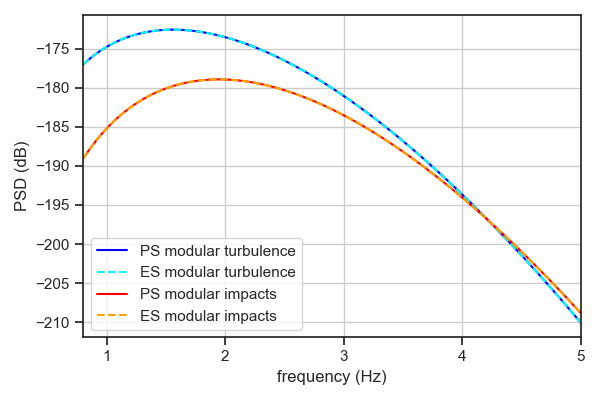

In [20]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_dB, color='b', label='PS modular turbulence')
plt.plot(freq, test_dB, color='cyan', linestyle='--', label='ES modular turbulence')
# plt.plot(freq, turbulencePSD_mod_min_dB, color='b', linestyle='--')
# plt.plot(freq, turbulencePSD_mod_max_dB, color='b', linestyle=':')

plt.plot(freq, impactsPSD_mod_dB, color='r', label='PS modular impacts')
plt.plot(freq, test_imp_dB, color='orange', linestyle='--', label='ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
# plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
# plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Changing implementation to using numerical Green's functions, rather than closed-form Rayleigh wave GFs.

In [21]:
def load_gfs_ES(directory, depths, INTERPOLATE=True, REPEATED=0):
    '''
    loads in extended source single force Green's functions in fourier domain 
    and can interpolate in space to get compatible array dimensions with desired 
    depth array
    
    original Green's functions must be stored such that the columns correspond below:
            time    vertical    radial   transverse

    --INPUTS--
    directory    : string            : path to folder holding Green's function files
    depths       : (# grid points)   : desired depth array
    INTERPOLATE  : bool              : if True, interpolate to get values at desired 
                                                and depths/frequencies
    --RETURNS--
    gf_freq : (# freq points)                       : sampled frequencies for GFs
    gfs     : [ (# grid points, # freq points, 3) ] : list of final Green's functions (ver, rad, tra)
                                                        single force, 2 arrays
    '''
    components = ['horizontal_force.mat', 'vertical_force.mat']
    
    if not INTERPOLATE:
        gfs = []
        gf_time = sio.loadmat(directory+'time.mat')['out'][0]
        for com in components:
            gf = sio.loadmat(directory+com)['out']
            gfs.append(gf)
        gc.collect()
        return gf_time, gfs

    gfs = []
    gfs_hat = []
    gf_time = sio.loadmat(directory+'time.mat')['out'][0]
    gf_tt = len(gf_time)
    if 'interpolated' in directory:
        gf_depths = sio.loadmat(directory+'depths.mat')['out'][0].astype(float)
    else:
        gf_depths = sio.loadmat(directory+'depths.mat')['out'][:].astype(float)*1e3
    gf_hh = len(gf_depths)
    hh = len(depths)
    gf_dt = gf_time[1] - gf_time[0]
    gf_freq = np.fft.fftfreq(gf_tt, gf_dt)
    ind0 = np.argwhere(gf_freq < 0)[0,0]

    for com in components:
        gf = np.zeros((gf_hh, gf_tt, 3))
        gf[:,:] = np.real(sio.loadmat(directory+com)['out'])
        for ii in range(REPEATED):
            gf[-ii] = gf[-REPEATED]
        gfs.append(gf)
        gfs_hat.append(np.fft.fft(gf, axis=1) * gf_dt)
    gc.collect()

    new_gfs_hat = []
    for func, lab in zip(gfs_hat, components):
        smooth = si.interp1d(gf_depths, func, axis=0, kind='linear', fill_value='extrapolate') #bounds_error=False, fill_value=(func[-1], func[0])    )
        gf_hat_sm = smooth(depths)
        new_gfs_hat.append(gf_hat_sm[:,:ind0])
    
    return gf_freq[:ind0], new_gfs_hat

In [22]:
def impact_PSD_ES_numGF(f, depths, gfs, u_mean, Dr, phi_p, dz=1, eb=0.8, R=9, rho_s=2700):
    '''
    calculates seismic PSD from particle impacts following eq 3 in Gestrich et al (2020) for
    extended source (rather than point source) using numerical Green's functions 
    rather than closed-form expression
    
    ---INPUTS---
    f      : frequencies to evaluate PSD
    depths : source depths (m)
    gfs    : numerical Green's functions for extended source
    u_mean : mean vertical velocity (m/s)
    Dr     : representative grain size (m)
    phi_p  : particle volume fraction
    
    optional
        dz     : segment vertical width (m)
        eb     : coefficient of restitution
        R      : conduit radius (m)
        rho_s  : solid density (kg / m^3)
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies
    '''
    ff = len(f)
    ll = len(depths)
    
    f_matrix = np.tile(f, (ll, 1))
    u_matrix = np.tile(u_mean, (ff, 1)).transpose()
    Dr_matrix = np.tile(Dr, (ff, 1)).transpose()
    phi_p_matrix = np.tile(phi_p, (ff, 1)).transpose()
    
    Dr_dist = 1 # for representative grain size
    m = rho_s * (4/3) * np.pi * Dr_matrix**3 # mass of representative grain size
    
    impact_force = particle_impact_force(eb, m, u_matrix)
    impact_rate = particle_impact_rate(u_matrix, phi_p_matrix, Dr_matrix, Dr_dist)
    gc.collect()
    
    FjGjz = impact_force[0] * gfs[:,:,1] + impact_force[1] * gfs[:,:,2] + impact_force[2] * gfs[:,:,0]
    
    PSD = 2 * np.pi * R * dz * impact_rate * (2 * np.pi * f_matrix * FjGjz)**2
    
    return PSD

In [23]:
def turbulence_PSD_ES_numGF(f, depths, gfs, u_mean, Db, rho_g, dz=1, R=9):
    '''
    calculates turbulence PSD according to equation 17 from Gestrich et al (2020) for
    extended source (rather than point source) using numerical Green's functions 
    rather than closed-form expression
    
    ---INPUTS---
    f      : frequencies to evaluate PSD
    depths : source depths (m)
    gfs    : numerical Green's functions for extended source
    u_mean : mean vertical velocity (m/s)
    Db     : roughness size (m)
    rho_g  : gas density (kg / m^3)
    
    optional
        dz     : segment vertical width (m)
        R      : conduit radius (m)
    
    ---RETURNS---
    PSD : array of PSD values at specified frequencies for each source segment
    '''
    ff = len(f)
    ll = len(depths)
    
    f_matrix = np.tile(f, (ll, 1))
    u_matrix = np.tile(u_mean, (ff, 1)).transpose()
    Db_matrix = np.tile(Db, (ff, 1)).transpose()
    rho_g_matrix = np.tile(rho_g, (ff, 1)).transpose()
    
    F_tilda = force_spectrum(f_matrix, u_matrix, rho_g_matrix, Db_matrix)
    gc.collect()
    
    FGjz2 = F_tilda * (gfs[:,:,1] + gfs[:,:,2] + gfs[:,:,0])**2
    
    PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2
    
    return PSD

In [24]:
directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/halfspace/halfA_conduit/extended_1km_sf/10km/'
ll = 1000
depths = np.linspace(1150, 150, ll)

f, gf_hat = load_gfs_ES(directory, depths)

In [25]:
Dr = 1.4e-3 * np.ones(ll)
Db = 0.5 * np.ones(ll)
u_mean = 120 * np.ones(ll)
phi_p = 0.1 * np.ones(ll)
rho_g = 0.5 * np.ones(ll)

num_imp = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr, phi_p)
num_imp_integrated = np.sum(num_imp, axis=0)
num_imp_dB = 10 * np.log10(num_imp_integrated)

num_turb = turbulence_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Db, rho_g)
num_turb_integrated = np.sum(num_turb, axis=0)
num_turb_dB = 10 * np.log10(num_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/4121214714.py:9: RuntimeWarning: divide by zero encountered in log10
  num_imp_dB = 10 * np.log10(num_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/4121214714.py:9: RuntimeWarning: invalid value encountered in multiply
  num_imp_dB = 10 * np.log10(num_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1660263274.py:19: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/2671711537.py:33: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (gfs[:,:,1] + gfs[:,:,2] + gfs[:,:,0])**2
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/2671711537.py:35: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2


In [26]:
impactsPSD_mod_1 = impact_PSD(freq, df=1000, rx=10e3, Q=25, rho_s=2700)
impactsPSD_mod_1_dB = 10 * np.log10(impactsPSD_mod_1)

turbulencePSD_mod_1 = turbulence_PSD(freq, df=1000, rx=10e3, Q=25, rho_s=2700)
turbulencePSD_mod_1_dB = 10 * np.log10(turbulencePSD_mod_1)

<IPython.core.display.Javascript object>


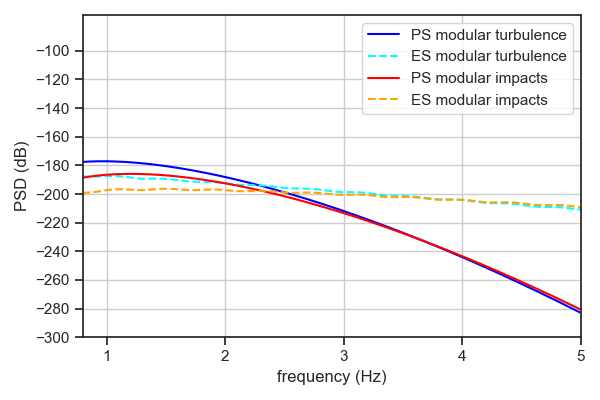

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [27]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_1_dB, color='b', label='PS modular turbulence')
plt.plot(f, num_turb_dB, color='cyan', linestyle='--', label='ES modular turbulence')

plt.plot(freq, impactsPSD_mod_1_dB, color='r', label='PS modular impacts')
plt.plot(f, num_imp_dB, color='orange', linestyle='--', label='ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Introducing steady-state solver to plug into above model

In [28]:
import numpy as np
import scipy
import scipy.integrate
from scipy.special import erf
import matplotlib.pyplot as plt
import os

os.chdir('/Users/kcoppess/muspelheim/quail_volcano/src/')

import compressible_conduit_steady.steady_state as SS
import compressible_conduit_steady.material_properties as matprops

os.chdir('/Users/kcoppess/muspelheim/quail_ODESS_map/')

In [29]:
Numerics = {
  # Solution order; these correspond to:
  # 0: 1 node in each element representing the average value
  # 1: 2 nodes in each element constituting a linear representation of the
  #    solution in the element
  # 2: 3 nodes in each element constituting a quadratic representation of the
  #    solution in the element
  "SolutionOrder" : 2,
#   "SolutionBasis" : "LagrangeSeg",
#   "Solver" : "DG",
#   "ApplyLimiters" : "PositivityPreservingMultiphasevpT",
#   "ElementQuadrature" : "GaussLegendre",
#   "FaceQuadrature" : "GaussLegendre",
#   # Artificial viscosity adds a diffusion term to all equations, where the                                                                                                                              
#   # strong form residual is large and where the pressure gradient relative to
#   # hydrostatic is large
#   "ArtificialViscosity" : True,
#   "AVParameter" : 0.3,
#   # If L2InitialCondition is false, use interpolation instead of L2 projection of Riemann data
#   'L2InitialCondition': False,
}

Mesh = {
#     "File" : None,
#     "ElementShape" : "Segment",
    # Use even number if using initial condition with discontinuous pressure
    "NumElemsX" : 2000, 
    "xmin" : -1000.0 - 150.0,
    "xmax" : 0.0 - 150.0,
}

n_elems_per_part = Mesh["NumElemsX"]
n_elems_global = 2*n_elems_per_part
if Numerics["SolutionOrder"] == 0:
    n_nodes_global = n_elems_global
elif Numerics["SolutionOrder"] == 1:
    n_nodes_global = n_elems_global + 1
elif Numerics["SolutionOrder"] == 2:
    n_nodes_global = 2*n_elems_global + 1
else:
    raise ValueError("Oops, is there solution order > 2?")
x_global = np.linspace(Mesh["xmin"], Mesh["xmax"], n_nodes_global)

phi_crys = 0.4 * (1.1 - 0.1 * np.cos(0.0)) #0.4025 * (1.1 - 0.1 * np.cos(0.0))
chi_water = 0.05 #0.05055
yWt_init = chi_water * (1 - phi_crys) / (1 + chi_water)
yC_init = phi_crys

p_vent = 1e5          # Vent pressure
inlet_input_val = 3 # Inlet velocity; see also BoundaryCondition["x1"]
input_type = "u"

n0 = chi_water
Sm = 5e-6

props = {
    "yC": yC_init,
    "yWt": yWt_init,
    "yA": 1e-7,
    "yWvInletMin": 1e-5,
    "yCMin": 1e-5,
    "crit_volfrac": 0.75,
    "tau_d": 10.0,
    "tau_f": 1.0,
    "conduit_radius": 20,
    "T_chamber": 1050,
    "c_v_magma": 3e3,
    "rho0_magma": 2.6e3,
    "K_magma": 10e9,
    "p0_magma": (n0 / Sm)**2,
    "solubility_k": Sm,
    "solubility_n": 0.5,
    "neglect_edfm": True,
}

In [30]:
x1 = x_global.copy()
x_quail = np.expand_dims(x1, axis=(1, 2))

ulow = 35e6 #35e6 #40414491.464006424
uhigh = 50e6 #41368282.82392311

f1 = SS.SteadyState(x1, p_vent, ulow, input_type='p', override_properties=props)
f5 = SS.SteadyState(x1, p_vent, uhigh, input_type='p', override_properties=props)

soln1 = f1(x1, io_format="phy")
p1, h1, y1, yFsoln1 = soln1[0:4]
T1 = f1.T_ph(p1, h1, y1)
rho1 = 1.0 / f1.v_mix(p1, T1, y1)
soln_quail1 = f1(x_quail, io_format="quail")
u1 = soln_quail1[:,0,3] / rho1
c_fn1 = lambda p, h, yWv: f1.mixture.sound_speed(
  p, f1.T_ph(p, h, yWv), f1.yA, yWv, 1.0 - f1.yA - yWv)
c1 = np.array(list(map(c_fn1, p1, h1, y1)))
phi1 = f1.mixture.vf_g(p1, T1, f1.yA, y1, 1.0-f1.yA-y1)
rho_g1 = (soln_quail1[:,0,0] + soln_quail1[:,0,1]) / phi1

soln5 = f5(x1, io_format="phy")
p5, h5, y5, yFsoln5 = soln5[0:4]
T5 = f5.T_ph(p5, h5, y5)
rho5 = 1.0 / f5.v_mix(p5, T5, y5)
soln_quail5 = f5(x_quail, io_format="quail")
u5 = soln_quail5[:,0,3] / rho5
c_fn5 = lambda p, h, yWv: f5.mixture.sound_speed(
  p, f5.T_ph(p, h, yWv), f5.yA, yWv, 1.0 - f5.yA - yWv)
c5 = np.array(list(map(c_fn5, p5, h5, y5)))
phi5 = f5.mixture.vf_g(p5, T5, f5.yA, y5, 1.0-f5.yA-y5)
rho_g5 = (soln_quail5[:,0,0] + soln_quail5[:,0,1]) / phi5

163935.6538231799 and 160289.62030700612
1.0032629604528358 and 1.0035427127332488
Computed choking mass flux: 1400.3391031717176; choking pressure: 155103.01622266392.
Choked at vent.
161743.2868992202 and 161839.62432299458
1.0031014553346875 and 1.0030948982981935
Computed choking mass flux: 1405.7910254339363; choking pressure: 152594.50269034677.
Choked at vent.


<IPython.core.display.Javascript object>


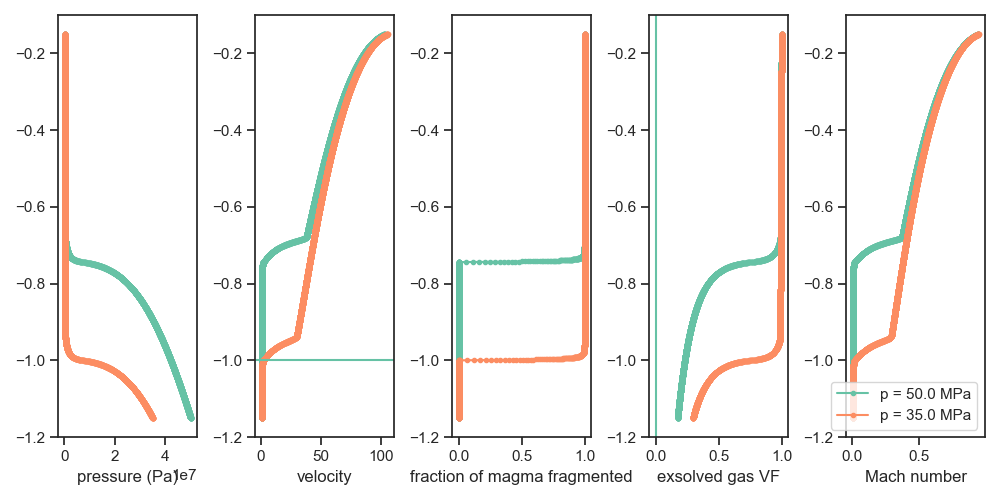

In [31]:
%matplotlib notebook
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

x = x_global.copy()

plt.figure(figsize=(10,5))
plt.subplot(1,5,1)
plt.plot(p5, x*1e-3, '.-')
plt.plot(p1, x*1e-3, '.-')
plt.xlabel('pressure (Pa)')
plt.subplot(1,5,2)
plt.plot(u5, x*1e-3, '.-')
plt.plot(u1, x*1e-3, '.-')
plt.axhline(x[frag_depth]*1e-3)
plt.xlabel('velocity')
plt.subplot(1,5,3)
plt.plot(yFsoln5 / (1.0 - y5), x*1e-3, '.-')
plt.plot(yFsoln1 / (1.0 - y1), (x)*1e-3, '.-')
# plt.ylim(-0.55, -0.5)
plt.xlabel('fraction of magma fragmented')
plt.subplot(1,5,4)
plt.plot(phi5, x*1e-3, '.-')
plt.plot(phi1, x*1e-3, '.-')
plt.axvline(0)
plt.xlabel('exsolved gas VF')
plt.subplot(1,5,5)
plt.plot(u5/c5, x*1e-3, '.-', label='p = '+str(round(uhigh*1e-6, 2))+' MPa')
plt.plot(u1/c1, x*1e-3, '.-', label='p = '+str(round(ulow*1e-6, 2))+' MPa')
plt.xlabel('Mach number')
plt.legend(frameon=True, loc=4)

plt.tight_layout()
# phi5 = ss.mixture.vf_g(p5, ss.mixture.T_ph(p5, h5, ss.yA, y5, 1.0-ss.yA-y5), ss.yA, y5, 1.0-ss.yA-y5)
# plt.plot(phi5, x, '.-')
# phi1 = ss.mixture.vf_g(p1, ss.mixture.T_ph(p1, h1, ss.yA, y1, 1.0-ss.yA-y1), ss.yA, y1, 1.0-ss.yA-y1)
# plt.plot(phi1, x, '.-')
# plt.xlabel('exsolved gas volume fraction')
plt.show() 

In [32]:
frag_depth = np.argwhere(phi1 > 0.75)[0,0]

depths = -x[frag_depth:]
ll = len(depths)
u_mean = u1[frag_depth:]
phi_p = 1.0 - phi1[frag_depth:]
rho_g = rho_g1[frag_depth:]

Dr = 1.4e-3 * np.ones(ll) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
Db = 0.5 * np.ones(ll)

directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/halfspace/halfA_conduit/extended_1km_sf/10km/'
f, gf_hat = load_gfs_ES(directory, depths)

SSnum_imp = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr, phi_p, dz = 0.5, R=20)
SSnum_imp_integrated = np.sum(SSnum_imp, axis=0)
SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)

SSnum_turb = turbulence_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Db, rho_g, dz = 0.5, R=20)
SSnum_turb_integrated = np.sum(SSnum_turb, axis=0)
SSnum_turb_dB = 10 * np.log10(SSnum_turb_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/813000955.py:17: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/813000955.py:17: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_dB = 10 * np.log10(SSnum_imp_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1660263274.py:19: RuntimeWarning: divide by zero encountered in power
  Ek = K * epsilon**(2/3) * kt**(-5/3) # eq 18 in Gestrich
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/2671711537.py:33: RuntimeWarning: invalid value encountered in multiply
  FGjz2 = F_tilda * (gfs[:,:,1] + gfs[:,:,2] + gfs[:,:,0])**2
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/2671711537.py:35: RuntimeWarning: invalid value encountered in multiply
  PSD = 8 * np.pi**3 * R * dz * f_matrix**2 * FGjz2


In [33]:
Dr_lin = np.linspace(0.5, 1.4e-3, ll)

SSnum_imp_lin = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr_lin, phi_p, dz = 0.5, R=20)
SSnum_imp_lin_integrated = np.sum(SSnum_imp_lin, axis=0)
SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1021905567.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1021905567.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_lin_dB = 10 * np.log10(SSnum_imp_lin_integrated)


In [34]:
Dr_linR = np.flip(Dr_lin)

SSnum_imp_linR = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr_linR, phi_p, dz = 0.5, R=20)
SSnum_imp_linR_integrated = np.sum(SSnum_imp_linR, axis=0)
SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/3014371678.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/3014371678.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_linR_dB = 10 * np.log10(SSnum_imp_linR_integrated)


In [35]:
Dr_log = np.logspace(np.log10(0.5), np.log10(1.4e-3), num=ll)

SSnum_imp_log = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr_log, phi_p, dz = 0.5, R=20)
SSnum_imp_log_integrated = np.sum(SSnum_imp_log, axis=0)
SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1885808827.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/1885808827.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_log_dB = 10 * np.log10(SSnum_imp_log_integrated)


In [36]:
Dr_logR = np.logspace(np.log10(1.4e-3), np.log10(0.5), num=ll)

SSnum_imp_logR = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr_logR, phi_p, dz = 0.5, R=20)
SSnum_imp_logR_integrated = np.sum(SSnum_imp_logR, axis=0)
SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/638870871.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/638870871.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_logR_dB = 10 * np.log10(SSnum_imp_logR_integrated)


In [37]:
Dr_max = 0.5 * np.ones(ll)

SSnum_imp_max = impact_PSD_ES_numGF(f, depths, gf_hat[1], u_mean, Dr_max, phi_p, dz = 0.5, R=20)
SSnum_imp_max_integrated = np.sum(SSnum_imp_max, axis=0)
SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)

/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/319360935.py:5: RuntimeWarning: divide by zero encountered in log10
  SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)
/var/folders/wj/yrvy2f3s0c1flzxmw9bh3g1r0000gn/T/ipykernel_25637/319360935.py:5: RuntimeWarning: invalid value encountered in multiply
  SSnum_imp_max_dB = 10 * np.log10(SSnum_imp_max_integrated)


<IPython.core.display.Javascript object>


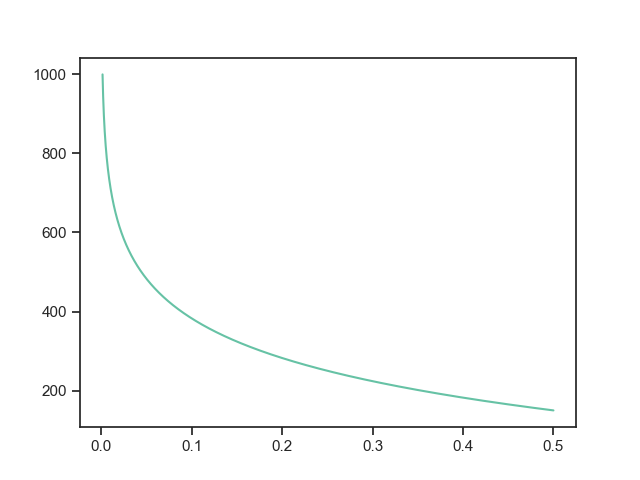

In [38]:
%matplotlib notebook
plt.plot(Dr_logR, depths)
plt.show()

<IPython.core.display.Javascript object>


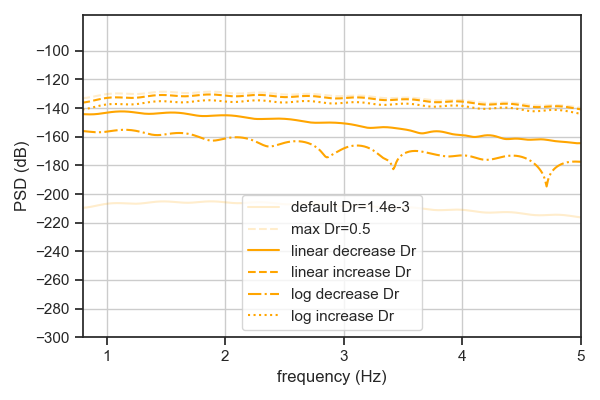

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kco

In [39]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', alpha=0.2, label='default Dr=1.4e-3')
plt.plot(f, SSnum_imp_max_dB, color='orange', linestyle='--', alpha=0.2, label='max Dr=0.5')
plt.plot(f, SSnum_imp_lin_dB, color='orange', linestyle='-', label='linear decrease Dr')
plt.plot(f, SSnum_imp_linR_dB, color='orange', linestyle='--', label='linear increase Dr')
plt.plot(f, SSnum_imp_log_dB, color='orange', linestyle='-.', label='log decrease Dr')
plt.plot(f, SSnum_imp_logR_dB, color='orange', linestyle=':', label='log increase Dr')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [40]:
impactsPSD_mod_2 = impact_PSD(freq, u_mean=np.average(u_mean), df=(0.5*ll), phi_p=np.average(phi_p),
                              Dr=np.average(Dr), R=20, rx=10e3, Q=25, rho_s=2700)
impactsPSD_mod_2_dB = 10 * np.log10(impactsPSD_mod_2)

turbulencePSD_mod_2 = turbulence_PSD(freq, u_mean=np.average(u_mean), df=(0.5*ll), rho_g=np.average(rho_g), 
                                     Db=np.average(Db), R=20, rx=10e3, Q=25, rho_s=2700)
turbulencePSD_mod_2_dB = 10 * np.log10(turbulencePSD_mod_2)

<IPython.core.display.Javascript object>


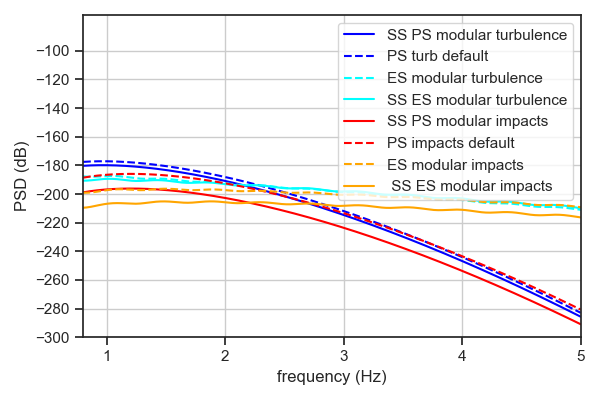

/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/kcoppess/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [41]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_2_dB, color='b', label='SS PS modular turbulence')
plt.plot(freq, turbulencePSD_mod_1_dB, color='b', linestyle='--', label='PS turb default')
plt.plot(f, num_turb_dB, color='cyan', linestyle='--', label='ES modular turbulence')
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='SS ES modular turbulence')

plt.plot(freq, impactsPSD_mod_2_dB, color='r', label='SS PS modular impacts')
plt.plot(freq, impactsPSD_mod_1_dB, color='r', linestyle='--', label='PS impacts default')
plt.plot(f, num_imp_dB, color='orange', linestyle='--', label='ES modular impacts')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label=' SS ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [42]:
frag_depth5 = np.argwhere(phi5 > 0.75)[0,0]

depths5 = -x[frag_depth5:]
ll5 = len(depths5)
u_mean5 = u5[frag_depth5:]
phi_p5 = 1.0 - phi5[frag_depth5:]
rho_g55 = rho_g5[frag_depth5:]

Dr5 = 1.4e-3 * np.ones(ll) #np.linspace(0.5, 1.4e-3, ll) #1.4e-3
Db5 = 0.5 * np.ones(ll)

directory = '/Users/kcoppess/muspelheim/synthetic-seismograms/synthetic-seismograms/greens_functions/halfspace/halfA_conduit/extended_1km_sf/10km/'
f, gf_hat5 = load_gfs_ES(directory, depths5)

SS5num_imp = impact_PSD_ES_numGF(f, depths5, gf_hat5[1], u_mean5, Dr5, phi_p5, dz = 0.5, R=20)
SS5num_imp_integrated = np.sum(SS5num_imp, axis=0)
SS5num_imp_dB = 10 * np.log10(SS5num_imp_integrated)

SS5num_turb = turbulence_PSD_ES_numGF(f, depths5, gf_hat5[1], u_mean5, Db5, rho_g55, dz = 0.5, R=20)
SS5num_turb_integrated = np.sum(SS5num_turb, axis=0)
SS5num_turb_dB = 10 * np.log10(SS5num_turb_integrated)

ValueError: operands could not be broadcast together with shapes (6799,1024) (4752,1024) 

In [ ]:
%matplotlib notebook

plt.figure(figsize=(6,4))

plt.plot(freq, turbulencePSD_mod_2_dB, color='b', label='SS PS modular turbulence')
plt.plot(freq, turbulencePSD_mod_1_dB, color='b', linestyle='--', label='PS turb default')
plt.plot(f, num_turb_dB, color='cyan', linestyle='--', label='ES modular turbulence')
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='SS ES modular turbulence')

plt.plot(freq, impactsPSD_mod_2_dB, color='r', label='SS PS modular impacts')
plt.plot(freq, impactsPSD_mod_1_dB, color='r', linestyle='--', label='PS impacts default')
plt.plot(f, num_imp_dB, color='orange', linestyle='--', label='ES modular impacts')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label=' SS ES modular impacts')
# plt.plot(freq, impactsPSD_mod_D, color='g', label='lowest Dr')
# plt.plot(freq, impactsPSD_mod_min_dB, color='r', linestyle='--')
# plt.plot(freq, impactsPSD_mod_max_dB, color='r', linestyle=':')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

Applying PSD to white noise in frequency domain and then transforming back into time domain to get waveform

In [ ]:
N = len(f)*2 # number of Fourier sample points
h = 0.04 # grid spacing, nominally h=0.1 km for r=1

L = N*h # profile length

# white noise, unit normal distribution
randomGen = np.random.default_rng(seed=13)
y = randomGen.normal(size=N)

# scale so PSD has unit amplitude
y = y*np.sqrt(N/L)

Y = np.fft.fft(y)*h

# calculate PSD and check for unit amplitude
PSDy = np.abs(Y)**2/L
print(np.average(PSDy))

# apply Gestrich PSD
PSD_tot = SSnum_imp_integrated + SSnum_turb_integrated
gestPSD = np.concatenate((PSD_tot, np.flip(PSD_tot)))
Y_gestES = Y * np.sqrt(gestPSD)
Y_gestES[0] = 0
Y_gestES[-1] = 0
PSDy_gestES = np.abs(Y_gestES)**2/L

PSDy_gestES_dB = 10 * np.log10(PSDy_gestES)

# apply mod PS gestrich PSD
impactsPSD_mod_max = impact_PSD(f, u_mean=300, eb=0.99, phi_p=0.25, Dr=0.5, R=40,
                          df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
turbulencePSD_mod_max = turbulence_PSD(f, u_mean=300, Db=1, rho_g=5, rho_s=2700, R=40,
                              df=1000, rx=9.5e3, vc0=1295, f0=1.0, xi=0.374, Q=30)
PSD_tot_PS = impactsPSD_mod_max + turbulencePSD_mod_max
gestPSD_PS = np.concatenate((PSD_tot_PS, np.flip(PSD_tot_PS)))
Y_gestPS = Y * np.sqrt(gestPSD_PS)
Y_gestPS[0] = 0
Y_gestPS[-1] = 0
PSDy_gestPS = np.abs(Y_gestPS)**2/L

PSDy_gestPS_dB = 10 * np.log10(PSDy_gestPS)

In [ ]:
%matplotlib notebook
# plt.plot(k, PSDy)
plt.plot(f, PSDy_gestES_dB[:int(N/2)])
plt.plot(f, PSDy_gestPS_dB[:int(N/2)])
plt.plot(f, SSnum_turb_dB, color='cyan', linestyle='-', label='SS ES modular turbulence')
plt.plot(f, SSnum_imp_dB, color='orange', linestyle='-', label=' SS ES modular impacts')

plt.grid()
plt.xlabel('frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.yticks(np.arange(-300, -85, 20.0))
plt.xticks(np.arange(0, 6, 1.0))
plt.ylim(-300, -75)
plt.xlim(0.8, 5)
plt.legend()
plt.tight_layout()
# plt.savefig('/Users/kcoppess/Desktop/gestrich/mod-full-PSD-comparision-new.png', dpi=300)
plt.show()

In [ ]:
# transforming back into time domain

y_ES = np.fft.ifft(Y_gestES) / h
y_ES = np.real(y_ES)
y_PS_max = np.real(np.fft.ifft(Y_gestPS) / h)
t = np.arange(N) * h

In [ ]:
%matplotlib notebook

plt.plot(t, y_ES*1e6)
# plt.plot(t, y_PS_max*1e6)
plt.show()